<a href="https://colab.research.google.com/github/AmadeusEsparza/Data-Science/blob/main/KNN_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Cancer data

## Objetivo:
Detectar los tumores malignos y beningnos mediante el dataset que recaba múltiples características

1. Aplicar el algoritmo de KNN a ([data.csv](https://drive.google.com/file/d/18f1srPV-Bwp_JH_t4_eujW1MgY1H3rZv/view?usp=drive_link))
2. Evaluar el rendimiento del modelo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/data.csv"

In [ ]:
c_data = pd.read_csv(url)
c_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
c_data['diagnosis'] = c_data['diagnosis'].map({'M': 1, 'B': 0})


In [ ]:
X = c_data.iloc[:, 2:]
y = c_data['diagnosis']

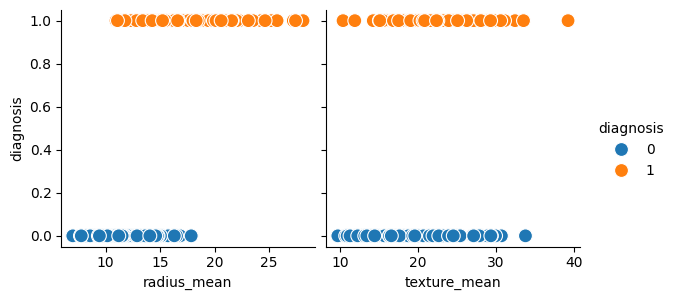

In [ ]:
sns.pairplot(x_vars=['radius_mean', 'texture_mean'],
             y_vars='diagnosis',
             data=c_data,
             plot_kws={'s': 100},
             height=3,
             hue='diagnosis')

In [ ]:
x = c_data.iloc[:, 2:].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
              nan],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
              nan],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
              nan],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
              nan],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
              nan],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
              nan]])

In [ ]:
y = c_data.iloc[:, 1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.75)

In [ ]:
len(x_train)

142

In [ ]:
len(x_test)

427

In [ ]:
import math
math.sqrt(len(x_train))

11.916375287812984

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
print(c_data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')


x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [ ]:
x_train

array([[0.28710017, 0.27947846, 0.27045924, ..., 0.18374383, 0.4657804 ,
        0.19583174],
       [0.36415544, 0.4744898 , 0.39321468, ..., 0.53115865, 0.16888232,
        0.67340196],
       [0.23277344, 0.5606576 , 0.22286668, ..., 0.27680004, 0.33554899,
        0.23255814],
       ...,
       [0.57092965, 0.53174603, 0.55188304, ..., 0.70692731, 0.33185623,
        0.37895539],
       [0.0279949 , 0.31519274, 0.02677578, ..., 0.06321675, 0.34293452,
        0.23992883],
       [0.60640834, 0.78401361, 0.6075004 , ..., 0.65970588, 0.42639094,
        0.54149193]])

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[0.27379566, 0.53741497, 0.26863181, ..., 0.38124934, 0.12653865,
        0.37679502],
       [0.53101613, 0.8015873 , 0.50897823, ..., 0.61885559, 0.19399311,
        0.30791714],
       [0.43234104, 0.49263039, 0.42952487, ..., 0.76201898, 0.36312161,
        0.59334096],
       ...,
       [0.2660347 , 0.31575964, 0.24511362, ..., 0.07146177, 0.05046775,
        0.08298386],
       [0.33366595, 0.41950113, 0.32091212, ..., 0.44833376, 0.27991137,
        0.44605414],
       [0.37912301, 0.4569161 , 0.36477038, ..., 0.32668236, 0.18685377,
        0.24679121]])

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

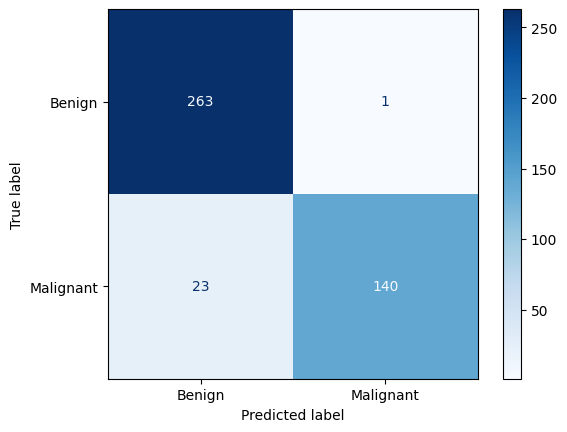

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ['Benign', 'Malignant']
normalize = None
ConfusionMatrixDisplay.from_estimator(
    classifier,
    x_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=normalize,
)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       264
           1       0.99      0.86      0.92       163

    accuracy                           0.94       427
   macro avg       0.96      0.93      0.94       427
weighted avg       0.95      0.94      0.94       427



In [ ]:
error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

error

[0.03747072599531616,
 0.04918032786885246,
 0.03278688524590164,
 0.03747072599531616,
 0.02810304449648712,
 0.053864168618266976,
 0.03981264637002342,
 0.0468384074941452,
 0.03981264637002342,
 0.05620608899297424,
 0.05620608899297424,
 0.0585480093676815,
 0.05620608899297424,
 0.06088992974238876,
 0.05152224824355972,
 0.06088992974238876,
 0.0585480093676815,
 0.06088992974238876,
 0.053864168618266976,
 0.06323185011709602,
 0.0585480093676815,
 0.06557377049180328,
 0.06791569086651054,
 0.07259953161592506,
 0.0702576112412178,
 0.07728337236533958,
 0.07259953161592506,
 0.08196721311475409,
 0.07494145199063232,
 0.08665105386416862,
 0.07962529274004684,
 0.08665105386416862,
 0.08665105386416862,
 0.09133489461358314,
 0.08899297423887588,
 0.09133489461358314,
 0.08430913348946135,
 0.08899297423887588,
 0.08196721311475409,
 0.08899297423887588,
 0.08430913348946135,
 0.08665105386416862,
 0.08665105386416862,
 0.08430913348946135,
 0.08196721311475409,
 0.0843091334

(0.0, 0.2)

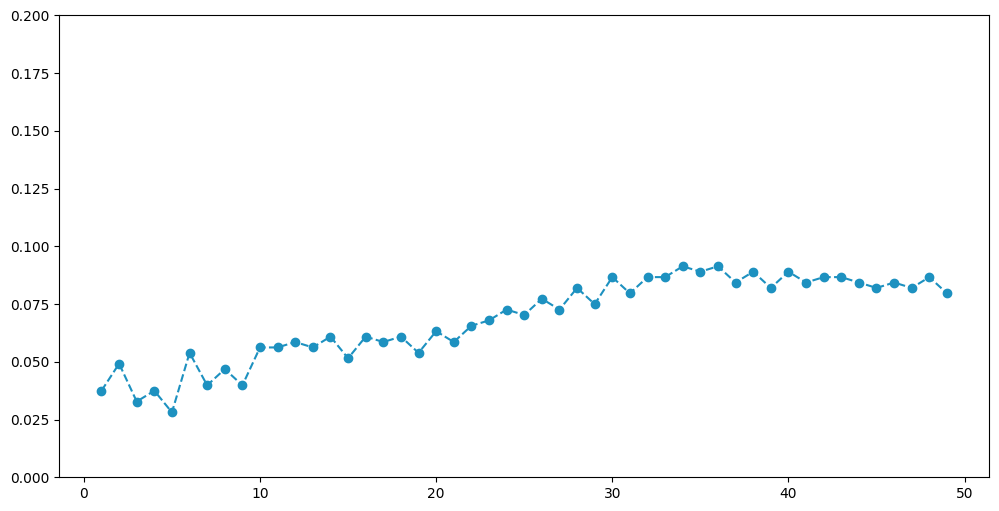

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 50), error, color = '#1d91c0', linestyle = 'dashed', marker = 'o')
plt.ylim(0, 0.2)